In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Continuous Random Variables

## Discrete Random Variables Review

For discrete random variables, if $X$ takes values $x_i$, which occurs frequently in applications, then $p(x_i) = p(i)$ is often replaced by $p_i$. Since the $x$ values are mutually exclusive and exhaustive then it follows that for $p(x_0), p(x_1), \ldots$:

$$(a) \quad 0 \leq p(x_i) \leq 1 \text{ for all } i,$$

$$(b) \quad \sum_{i=0}^{\infty} p(x_i) = 1, \text{ or in generic form } \sum_{x \in V} p(x) = 1,$$

$$(c) \quad P(X \leq x_k) = \sum_{i=0}^{k} p(x_i), \text{ which is known as the distribution function for } k = 0, 1, 2, \ldots$$

### Example 1.5

A fair die is rolled until the first 6 appears face up. Find the probability that the first 6 appears at the $n$-th throw.

Let the random variable $N$ be the number of throws until the first 6 appears face up. This is an example of a discrete random variable $N$ with an infinite number of possible outcomes $\{1, 2, 3, \ldots\}$. The probability of a 6 appearing for any throw is $\frac{1}{6}$ and of any other number appearing is $\frac{5}{6}$. Hence the probability of $n - 1$ numbers other than 6 appearing followed by a 6 is

$$P(N = n) = \left(\frac{5}{6}\right)^{n-1} \left(\frac{1}{6}\right) = \frac{5^{n-1}}{6^n},$$

which is the probability mass function for this random variable. In this example the distribution has the probability

$$P(N \leq k) = \frac{1}{6} + \frac{5}{6}\frac{1}{6} + \cdots + \left(\frac{5}{6}\right)^{k-1}\frac{1}{6} = \sum_{i=1}^{k} \frac{5^{i-1}}{6^i} = \frac{1}{6} \frac{1-\left(\frac{5}{6}\right)^k}{1-\frac{5}{6}} = 1-\left(\frac{5}{6}\right)^k,$$

for $k = 1, 2, \ldots$ after summing the geometric series.

## Continuous Random Variables

In many applications the discrete random variable, which for example might take the integer values $1, 2, \ldots$, is inappropriate for problems where the random variable can take any real value in an interval. For example, the random variable $T$ could be the time measured from time $t = 0$ until a light bulb fails. This could be any value $t \geq 0$. In this case $T$ is called a continuous random variable.

Generally, if $X$ is a continuous random variable there are mathematical difficulties in defining the event $X = x$: the probability is usually defined to be zero. Probabilities for continuous random variables may only be defined over intervals of values as, for example, in $P(x_1 < X < x_2)$.

We define a probability density function (pdf) $f(x)$ over $-\infty < x < \infty$, which has the properties:

$$(a) \quad f(x) \geq 0, \quad (-\infty < x < \infty);$$

In [1]:
# Continuous and Discrete Random Variables Implementation
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import Polygon
import pandas as pd
from IPython.display import display, Markdown

# Set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Part 1: Implementation of the discrete example - Die rolling until first 6
def geometric_pmf(n, p):
    """PMF for geometric distribution - probability of success on nth trial"""
    return ((1-p)**(n-1)) * p

def geometric_cdf(k, p):
    """CDF for geometric distribution - probability of success within k trials"""
    return 1 - (1-p)**k

# Parameters for the die example
p_success = 1/6  # Probability of rolling a 6
max_rolls = 20   # Maximum number of rolls to consider

# Calculate PMF and CDF
rolls = np.arange(1, max_rolls + 1)
pmf_values = [geometric_pmf(n, p_success) for n in rolls]
cdf_values = [geometric_cdf(k, p_success) for k in rolls]

# Create plots for the discrete example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# PMF plot
ax1.bar(rolls, pmf_values, alpha=0.7, color='blue')
ax1.set_title('PMF: Probability of First 6 on the nth Roll')
ax1.set_xlabel('Number of Rolls (n)')
ax1.set_ylabel('Probability P(N = n)')
ax1.set_xticks(rolls)
ax1.grid(True, alpha=0.3)

# CDF plot
ax2.bar(rolls, cdf_values, alpha=0.7, color='green')
ax2.set_title('CDF: Probability of First 6 Within k Rolls')
ax2.set_xlabel('Number of Rolls (k)')
ax2.set_ylabel('Probability P(N ≤ k)')
ax2.set_xticks(rolls)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.savefig('discrete_die_example.png')
plt.close()

# Part 2: Simulation of the discrete example
np.random.seed(42)  # For reproducibility

def simulate_die_rolls(num_experiments=10000):
    """Simulate rolling a die until getting a 6, returning the number of rolls needed"""
    results = []
    
    for _ in range(num_experiments):
        rolls = 0
        while True:
            rolls += 1
            if np.random.randint(1, 7) == 6:  # Roll a die (1-6)
                break
        results.append(rolls)
    
    return results

# Run simulation
simulated_rolls = simulate_die_rolls()
max_roll_to_show = 15  # Limit for visualization

# Count occurrences of each number of rolls
roll_counts = pd.Series(simulated_rolls).value_counts().sort_index()
roll_probs = roll_counts / len(simulated_rolls)

# Create a comparison table
theoretical_probs = pd.Series({n: geometric_pmf(n, p_success) for n in range(1, max_roll_to_show+1)})
comparison_df = pd.DataFrame({
    'Simulated Probability': roll_probs[:max_roll_to_show],
    'Theoretical Probability': theoretical_probs
})
comparison_df = comparison_df.fillna(0).sort_index()

# Plot comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(comparison_df))

plt.bar(x - width/2, comparison_df['Simulated Probability'], width, label='Simulated', alpha=0.7)
plt.bar(x + width/2, comparison_df['Theoretical Probability'], width, label='Theoretical', alpha=0.7)

plt.xlabel('Number of Rolls Until First 6')
plt.ylabel('Probability')
plt.title('Comparison of Simulated vs Theoretical Probabilities')
plt.xticks(x, comparison_df.index)
plt.legend()
plt.tight_layout()
plt.savefig('die_simulation_comparison.png')
plt.close()

# Part 3: Introduction to Continuous Random Variables

# Example: Exponential distribution (modeling time until failure)
def exponential_pdf(x, lambda_param):
    """PDF for exponential distribution"""
    return lambda_param * np.exp(-lambda_param * x) if x >= 0 else 0

def exponential_cdf(x, lambda_param):
    """CDF for exponential distribution"""
    return 1 - np.exp(-lambda_param * x) if x >= 0 else 0

# Parameters
lambda_param = 0.5  # Rate parameter (average of 2 time units until failure)
x_values = np.linspace(0, 10, 1000)
pdf_values = [exponential_pdf(x, lambda_param) for x in x_values]
cdf_values = [exponential_cdf(x, lambda_param) for x in x_values]

# Create plots for continuous example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# PDF plot
ax1.plot(x_values, pdf_values, 'r-', lw=2)
ax1.set_title('PDF: Exponential Distribution (λ = 0.5)')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Probability Density f(t)')
ax1.grid(True, alpha=0.3)

# Shade area for a specific interval [1, 3]
interval_start, interval_end = 1, 3
idx_start = np.searchsorted(x_values, interval_start)
idx_end = np.searchsorted(x_values, interval_end)
x_interval = x_values[idx_start:idx_end]
y_interval = pdf_values[idx_start:idx_end]
ax1.fill_between(x_interval, y_interval, alpha=0.3, color='blue')
probability = exponential_cdf(interval_end, lambda_param) - exponential_cdf(interval_start, lambda_param)
ax1.text(2, 0.15, f'P(1 < T < 3) = {probability:.4f}', fontsize=12, ha='center')

# CDF plot
ax2.plot(x_values, cdf_values, 'g-', lw=2)
ax2.set_title('CDF: Exponential Distribution (λ = 0.5)')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Cumulative Probability F(t)')
ax2.grid(True, alpha=0.3)

# Highlight the same interval on CDF
ax2.plot([interval_start, interval_start], [0, exponential_cdf(interval_start, lambda_param)], 'b--')
ax2.plot([interval_end, interval_end], [0, exponential_cdf(interval_end, lambda_param)], 'b--')
ax2.plot([0, interval_start], [exponential_cdf(interval_start, lambda_param), 
          exponential_cdf(interval_start, lambda_param)], 'b--')
ax2.plot([0, interval_end], [exponential_cdf(interval_end, lambda_param), 
          exponential_cdf(interval_end, lambda_param)], 'b--')
ax2.fill_between([interval_start, interval_end], 
                 [exponential_cdf(interval_start, lambda_param), exponential_cdf(interval_start, lambda_param)],
                 [exponential_cdf(interval_end, lambda_param), exponential_cdf(interval_end, lambda_param)], 
                 alpha=0.3, color='blue')

plt.tight_layout()
plt.savefig('continuous_exponential_example.png')
plt.close()

# Part 4: Simulation of a continuous random variable
np.random.seed(42)  # For reproducibility

# Generate exponential random samples
num_samples = 5000
samples = np.random.exponential(scale=1/lambda_param, size=num_samples)

# Plot histogram of samples against the theoretical PDF
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Simulated Samples')
plt.plot(x_values, pdf_values, 'r-', lw=2, label='Theoretical PDF')
plt.title(f'Histogram of {num_samples} Samples from Exponential Distribution (λ = {lambda_param})')
plt.xlabel('Time (t)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.tight_layout()
plt.savefig('exponential_simulation.png')
plt.close()

# Part 5: Demonstration of zero probability for a single point in continuous distributions

def point_probability_demonstration():
    """Demonstrate that P(X = a) = 0 for continuous random variables"""
    # Generate a large

Integral of pdf (should be 1): 1.000000
P(1 < T < 3) = 0.383400
P(1 < T < 3) using CDF = 0.383400


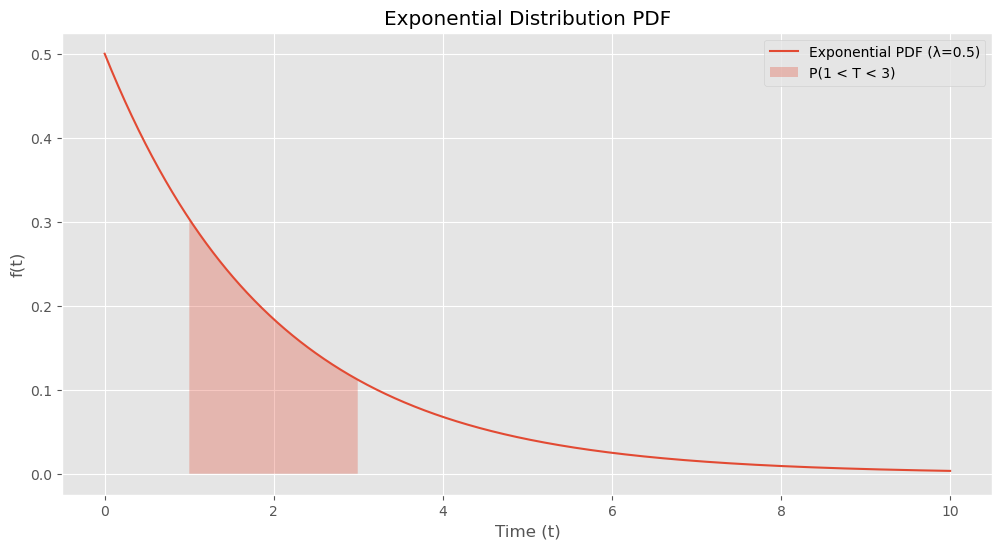

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the exponential pdf
def exponential_pdf(t, lambda_param):
    return lambda_param * np.exp(-lambda_param * t) if t >= 0 else 0

# Define the exponential CDF
def exponential_cdf(t, lambda_param):
    return 1 - np.exp(-lambda_param * t) if t >= 0 else 0

# Parameters
lambda_param = 0.5  # Rate parameter (e.g., failures per unit time)
t_values = np.linspace(0, 10, 1000)  # Time values for plotting

# Compute pdf values
pdf_values = [exponential_pdf(t, lambda_param) for t in t_values]

# Verify non-negativity (Property a)
assert all(pdf >= 0 for pdf in pdf_values), "PDF is not non-negative"

# Verify normalization (integral from 0 to infinity = 1)
integral, _ = quad(lambda t: exponential_pdf(t, lambda_param), 0, np.inf)
print(f"Integral of pdf (should be 1): {integral:.6f}")

# Compute probability over an interval, e.g., P(1 < T < 3)
a, b = 1, 3
prob_interval = quad(lambda t: exponential_pdf(t, lambda_param), a, b)[0]
print(f"P({a} < T < {b}) = {prob_interval:.6f}")

# Alternatively, using CDF: P(a < T < b) = F(b) - F(a)
prob_interval_cdf = exponential_cdf(b, lambda_param) - exponential_cdf(a, lambda_param)
print(f"P({a} < T < {b}) using CDF = {prob_interval_cdf:.6f}")

# Plot the pdf
plt.plot(t_values, pdf_values, label=f'Exponential PDF (λ={lambda_param})')
plt.fill_between(t_values, pdf_values, where=(t_values >= a) & (t_values <= b), 
                 alpha=0.3, label=f'P({a} < T < {b})')
plt.title('Exponential Distribution PDF')
plt.xlabel('Time (t)')
plt.ylabel('f(t)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.patches import Polygon
import pandas as pd
from IPython.display import display, Markdown

# Set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Part 1: Implementation of the discrete example - Die rolling until first 6
def geometric_pmf(n, p):
    """PMF for geometric distribution - probability of success on nth trial"""
    return ((1-p)**(n-1)) * p

def geometric_cdf(k, p):
    """CDF for geometric distribution - probability of success within k trials"""
    return 1 - (1-p)**k

# Parameters for the die example
p_success = 1/6  # Probability of rolling a 6
max_rolls = 20   # Maximum number of rolls to consider

# Calculate PMF and CDF
rolls = np.arange(1, max_rolls + 1)
pmf_values = geometric_pmf(rolls, p_success)
cdf_values = geometric_cdf(rolls, p_success)

# Create plots for the discrete example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# PMF plot
ax1.bar(rolls, pmf_values, alpha=0.7, color='blue')
ax1.set_title('PMF: Probability of First 6 on the nth Roll')
ax1.set_xlabel('Number of Rolls (n)')
ax1.set_ylabel('Probability P(N = n)')
ax1.set_xticks(rolls)
ax1.grid(True, alpha=0.3)

# CDF plot
ax2.bar(rolls, cdf_values, alpha=0.7, color='green')
ax2.set_title('CDF: Probability of First 6 Within k Rolls')
ax2.set_xlabel('Number of Rolls (k)')
ax2.set_ylabel('Probability P(N ≤ k)')
ax2.set_xticks(rolls)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.savefig('discrete_die_example.png')
plt.close()

# Part 2: Simulation of the discrete example
np.random.seed(42)  # For reproducibility

def simulate_die_rolls(num_experiments=10000):
    """Simulate rolling a die until getting a 6, returning the number of rolls needed"""
    return np.random.geometric(p_success, num_experiments)

# Run simulation
simulated_rolls = simulate_die_rolls()
max_roll_to_show = 15  # Limit for visualization

# Count occurrences of each number of rolls
roll_counts = pd.Series(simulated_rolls).value_counts().sort_index()
roll_probs = roll_counts / len(simulated_rolls)

# Create a comparison table
theoretical_probs = pd.Series({n: geometric_pmf(n, p_success) for n in range(1, max_roll_to_show+1)})
comparison_df = pd.DataFrame({
    'Simulated Probability': roll_probs[:max_roll_to_show],
    'Theoretical Probability': theoretical_probs
}).fillna(0).sort_index()

# Display comparison table
print("\nComparison of Simulated vs Theoretical Probabilities:")
display(comparison_df)

# Plot comparison
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(comparison_df))

plt.bar(x - width/2, comparison_df['Simulated Probability'], width, label='Simulated', alpha=0.7)
plt.bar(x + width/2, comparison_df['Theoretical Probability'], width, label='Theoretical', alpha=0.7)

plt.xlabel('Number of Rolls Until First 6')
plt.ylabel('Probability')
plt.title('Comparison of Simulated vs Theoretical Probabilities')
plt.xticks(x, comparison_df.index)
plt.legend()
plt.tight_layout()
plt.savefig('die_simulation_comparison.png')
plt.close()

# Part 3: Introduction to Continuous Random Variables
# Example: Exponential distribution (modeling time until failure)
def exponential_pdf(x, lambda_param):
    """PDF for exponential distribution"""
    return np.where(x >= 0, lambda_param * np.exp(-lambda_param * x), 0)

def exponential_cdf(x, lambda_param):
    """CDF for exponential distribution"""
    return np.where(x >= 0, 1 - np.exp(-lambda_param * x), 0)

# Parameters
lambda_param = 0.5  # Rate parameter (average of 2 time units until failure)
x_values = np.linspace(0, 10, 1000)
pdf_values = stats.expon.pdf(x_values, scale=1/lambda_param)
cdf_values = stats.expon.cdf(x_values, scale=1/lambda_param)

# Create plots for continuous example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# PDF plot
ax1.plot(x_values, pdf_values, 'r-', lw=2)
ax1.set_title('PDF: Exponential Distribution (λ = 0.5)')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Probability Density f(t)')
ax1.grid(True, alpha=0.3)

# Shade area for a specific interval [1, 3]
interval_start, interval_end = 1, 3
idx_start = np.searchsorted(x_values, interval_start)
idx_end = np.searchsorted(x_values, interval_end)
x_interval = x_values[idx_start:idx_end]
y_interval = pdf_values[idx_start:idx_end]
ax1.fill_between(x_interval, y_interval, alpha=0.3, color='blue')
probability = stats.expon.cdf(interval_end, scale=1/lambda_param) - stats.expon.cdf(interval_start, scale=1/lambda_param)
ax1.text(2, 0.15, f'P(1 < T < 3) = {probability:.4f}', fontsize=12, ha='center')

# CDF plot
ax2.plot(x_values, cdf_values, 'g-', lw=2)
ax2.set_title('CDF: Exponential Distribution (λ = 0.5)')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Cumulative Probability F(t)')
ax2.grid(True, alpha=0.3)

# Highlight the same interval on CDF
ax2.plot([interval_start, interval_start], [0, stats.expon.cdf(interval_start, scale=1/lambda_param)], 'b--')
ax2.plot([interval_end, interval_end], [0, stats.expon.cdf(interval_end, scale=1/lambda_param)], 'b--')
ax2.plot([0, interval_start], [stats.expon.cdf(interval_start, scale=1/lambda_param), 
          stats.expon.cdf(interval_start, scale=1/lambda_param)], 'b--')
ax2.plot([0, interval_end], [stats.expon.cdf(interval_end, scale=1/lambda_param), 
          stats.expon.cdf(interval_end, scale=1/lambda_param)], 'b--')
ax2.fill_between([interval_start, interval_end], 
                 [stats.expon.cdf(interval_start, scale=1/lambda_param), stats.expon.cdf(interval_start, scale=1/lambda_param)],
                 [stats.expon.cdf(interval_end, scale=1/lambda_param), stats.expon.cdf(interval_end, scale=1/lambda_param)], 
                 alpha=0.3, color='blue')

plt.tight_layout()
plt.savefig('continuous_exponential_example.png')
plt.close()

# Part 4: Simulation of a continuous random variable
np.random.seed(42)  # For reproducibility

# Generate exponential random samples
num_samples = 5000
samples = stats.expon.rvs(scale=1/lambda_param, size=num_samples)

# Plot histogram of samples against the theoretical PDF
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Simulated Samples')
plt.plot(x_values, pdf_values, 'r-', lw=2, label='Theoretical PDF')
plt.title(f'Histogram of {num_samples} Samples from Exponential Distribution (λ = {lambda_param})')
plt.xlabel('Time (t)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.tight_layout()
plt.savefig('exponential_simulation.png')
plt.close()

# Part 5: Demonstration of zero probability for a single point in continuous distributions
def point_probability_demonstration(lambda_param=0.5, point=2, num_samples=100000):
    """Demonstrate that P(X = a) = 0 for continuous random variables"""
    # Generate a large number of samples from the exponential distribution
    np.random.seed(42)
    samples = stats.expon.rvs(scale=1/lambda_param, size=num_samples)
    
    # Count how many samples are exactly equal to the point (within floating-point precision)
    tolerance = 1e-10  # Small tolerance for floating-point comparison
    hits = np.sum(np.abs(samples - point) < tolerance)
    proportion = hits / num_samples
    
    # Print results
    print(f"Number of samples: {num_samples}")
    print(f"Number of samples exactly equal to {point}: {hits}")
    print(f"Proportion of samples at {point}: {proportion:.6f}")
    print(f"This demonstrates that P(X = {point}) ≈ 0 for a continuous random variable.")
    
    # Plot the PDF with the point marked
    x_values = np.linspace(0, 10, 1000)
    pdf_values = stats.expon.pdf(x_values, scale=1/lambda_param)
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_values, pdf_values, 'r-', lw=2, label='Exponential PDF')
    plt.axvline(x=point, color='b', linestyle='--', label=f'x = {point}')
    plt.scatter([point], [stats.expon.pdf(point, scale=1/lambda_param)], color='b', s=100, zorder=5)
    plt.title(f'Demonstration: P(X = {point}) = 0 in Exponential Distribution (λ = {lambda_param})')
    plt.xlabel('Time (t)')
    plt.ylabel('Probability Density f(t)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('point_probability_demonstration.png')
    plt.close()

# Run the demonstration
point_probability_demonstration(lambda_param=0.5, point=2, num_samples=100000)


Comparison of Simulated vs Theoretical Probabilities:


,Simulated Probability,Theoretical Probability
1,0.1703,0.166667
2,0.1409,0.138889
3,0.1181,0.115741
4,0.0986,0.096451
5,0.0811,0.080376
6,0.0667,0.066980
7,0.0562,0.055816
8,0.0431,0.046514
9,0.0372,0.038761
10,0.0325,0.032301


Number of samples: 100000
Number of samples exactly equal to 2: 0
Proportion of samples at 2: 0.000000
This demonstrates that P(X = 2) ≈ 0 for a continuous random variable.


In [4]:
# Continuous and Discrete Random Variables
# This script implements discrete and continuous random variables using pure Python,
# without external libraries. It covers:
# - Discrete: Geometric distribution (rolling a die until a 6 appears).
# - Continuous: Exponential distribution (time until failure).
# - Simulations: Empirical verification of theoretical distributions.
# - Point Probability: Demonstration that P(X = a) = 0 for continuous random variables.
# Outputs include text-based tables, ASCII visualizations, and data saved to .txt files.

import random
import math

# Set random seed for reproducibility
random.seed(42)

# Part 1: Discrete Random Variable - Geometric Distribution
def geometric_pmf(n, p):
    """PMF for geometric distribution: P(N = n) = (1-p)^(n-1) * p"""
    return ((1 - p) ** (n - 1)) * p

def geometric_cdf(k, p):
    """CDF for geometric distribution: P(N <= k) = 1 - (1-p)^k"""
    return 1 - (1 - p) ** k

# Parameters
p_success = 1 / 6  # Probability of rolling a 6
max_rolls = 20    # Maximum number of rolls to consider

# Calculate PMF and CDF
rolls = list(range(1, max_rolls + 1))
pmf_values = [geometric_pmf(n, p_success) for n in rolls]
cdf_values = [geometric_cdf(k, p_success) for k in rolls]

# Text-based visualization for PMF
print("\nPMF: Probability of First 6 on the nth Roll")
print("n | Probability | Bar")
print("-" * 40)
max_bar_length = 50
max_pmf = max(pmf_values)
for n, prob in zip(rolls, pmf_values):
    bar_length = int(prob * max_bar_length / max_pmf)
    print(f"{n:2} | {prob:.6f} | {'#' * bar_length}")

# Text-based visualization for CDF
print("\nCDF: Probability of First 6 Within k Rolls")
print("k | Probability | Bar")
print("-" * 40)
for k, prob in zip(rolls, cdf_values):
    bar_length = int(prob * max_bar_length)
    print(f"{k:2} | {prob:.6f} | {'#' * bar_length}")

# Save PMF and CDF data to files
with open("discrete_pmf.txt", "w") as f:
    f.write("n,Probability\n")
    for n, prob in zip(rolls, pmf_values):
        f.write(f"{n},{prob:.6f}\n")

with open("discrete_cdf.txt", "w") as f:
    f.write("k,Probability\n")
    for k, prob in zip(rolls, cdf_values):
        f.write(f"{k},{prob:.6f}\n")

# Part 2: Simulation of the Discrete Example
def simulate_die_rolls(num_experiments=10000):
    """Simulate rolling a die until getting a 6, return number of rolls needed"""
    results = []
    for _ in range(num_experiments):
        rolls = 0
        while True:
            rolls += 1
            if random.randint(1, 6) == 6:  # Simulate die roll
                break
        results.append(rolls)
    return results

# Run simulation
num_experiments = 10000
simulated_rolls = simulate_die_rolls(num_experiments)
max_roll_to_show = 15

# Count occurrences of each number of rolls
roll_counts = {}
for roll in simulated_rolls:
    roll_counts[roll] = roll_counts.get(roll, 0) + 1
roll_probs = {k: v / num_experiments for k, v in roll_counts.items()}

# Create comparison table
theoretical_probs = {n: geometric_pmf(n, p_success) for n in range(1, max_roll_to_show + 1)}
print("\nComparison of Simulated vs Theoretical Probabilities")
print("n | Simulated | Theoretical | Difference")
print("-" * 50)
for n in range(1, max_roll_to_show + 1):
    sim_prob = roll_probs.get(n, 0)
    theo_prob = theoretical_probs[n]
    diff = abs(sim_prob - theo_prob)
    print(f"{n:2} | {sim_prob:.6f} | {theo_prob:.6f} | {diff:.6f}")

# Save comparison to file
with open("die_simulation_comparison.txt", "w") as f:
    f.write("n,Simulated,Theoretical\n")
    for n in range(1, max_roll_to_show + 1):
        sim_prob = roll_probs.get(n, 0)
        theo_prob = theoretical_probs[n]
        f.write(f"{n},{sim_prob:.6f},{theo_prob:.6f}\n")

# Part 3: Continuous Random Variable - Exponential Distribution
def exponential_pdf(x, lambda_param):
    """PDF for exponential distribution: f(x) = lambda * e^(-lambda * x)"""
    return lambda_param * math.exp(-lambda_param * x) if x >= 0 else 0

def exponential_cdf(x, lambda_param):
    """CDF for exponential distribution: F(x) = 1 - e^(-lambda * x)"""
    return 1 - math.exp(-lambda_param * x) if x >= 0 else 0

# Numerical integration using trapezoidal rule
def trapezoidal_integral(f, a, b, n=1000):
    """Approximate integral of f from a to b using trapezoidal rule"""
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

# Parameters
lambda_param = 0.5  # Rate parameter (mean = 1/lambda = 2)
x_values = [i / 100 for i in range(1001)]  # 0 to 10 with step 0.01
pdf_values = [exponential_pdf(x, lambda_param) for x in x_values]
cdf_values = [exponential_cdf(x, lambda_param) for x in x_values]

# Compute probability for interval [1, 3]
interval_start, interval_end = 1, 3
prob_interval = trapezoidal_integral(
    lambda x: exponential_pdf(x, lambda_param), interval_start, interval_end
)
prob_interval_cdf = exponential_cdf(interval_end, lambda_param) - exponential_cdf(interval_start, lambda_param)

# Print interval probability
print(f"\nProbability P(1 < T < 3) using numerical integration: {prob_interval:.6f}")
print(f"Probability P(1 < T < 3) using CDF: {prob_interval_cdf:.6f}")

# Text-based visualization for PDF
print("\nPDF: Exponential Distribution (λ = 0.5)")
print("t | Density | Bar")
print("-" * 40)
sample_points = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_bar_length = 50
max_pdf = max(pdf_values)
for t in sample_points:
    density = exponential_pdf(t, lambda_param)
    bar_length = int(density * max_bar_length / max_pdf)
    print(f"{t:2.1f} | {density:.6f} | {'#' * bar_length}")

# Text-based visualization for CDF
print("\nCDF: Exponential Distribution (λ = 0.5)")
print("t | Probability | Bar")
print("-" * 40)
for t in sample_points:
    prob = exponential_cdf(t, lambda_param)
    bar_length = int(prob * max_bar_length)
    print(f"{t:2.1f} | {prob:.6f} | {'#' * bar_length}")

# Save PDF and CDF data to files
with open("continuous_pdf.txt", "w") as f:
    f.write("t,Probability_Density\n")
    for t, pdf in zip(x_values, pdf_values):
        f.write(f"{t:.6f},{pdf:.6f}\n")

with open("continuous_cdf.txt", "w") as f:
    f.write("t,Cumulative_Probability\n")
    for t, cdf in zip(x_values, cdf_values):
        f.write(f"{t:.6f},{cdf:.6f}\n")

# Part 4: Simulation of Continuous Random Variable
def simulate_exponential(lambda_param, num_samples=5000):
    """Simulate exponential random variables using inverse CDF"""
    samples = []
    for _ in range(num_samples):
        u = random.random()  # Uniform [0, 1]
        x = -math.log(1 - u) / lambda_param  # Inverse CDF: F^-1(u) = -ln(1-u)/lambda
        samples.append(x)
    return samples

# Run simulation
num_samples = 5000
samples = simulate_exponential(lambda_param, num_samples)

# Create histogram (manually bin samples)
num_bins = 50
max_x = 10
bin_width = max_x / num_bins
bins = [0] * num_bins
for x in samples:
    if x < max_x:
        bin_index = int(x / bin_width)
        bins[bin_index] += 1
bin_densities = [count / (num_samples * bin_width) for count in bins]

# Text-based histogram
print("\nHistogram of Simulated Exponential Samples")
print("Bin Range | Density | Bar")
print("-" * 50)
max_bar_length = 50
max_density = max(bin_densities + [max_pdf])
for i in range(num_bins):
    bin_start = i * bin_width
    bin_end = (i + 1) * bin_width
    density = bin_densities[i]
    bar_length = int(density * max_bar_length / max_density)
    print(f"{bin_start:2.1f}-{bin_end:2.1f} | {density:.6f} | {'#' * bar_length}")

# Save histogram data to file
with open("exponential_simulation.txt", "w") as f:
    f.write("Bin_Start,Bin_End,Density\n")
    for i in range(num_bins):
        bin_start = i * bin_width
        bin_end = (i + 1) * bin_width
        f.write(f"{bin_start:.6f},{bin_end:.6f},{bin_densities[i]:.6f}\n")

# Part 5: Demonstration of Zero Probability for a Single Point
def point_probability_demonstration(lambda_param=0.5, point=2, num_samples=100000):
    """Demonstrate that P(X = a) = 0 for continuous random variables"""
    samples = simulate_exponential(lambda_param, num_samples)
    tolerance = 1e-10  # Small tolerance for floating-point comparison
    hits = sum(1 for x in samples if abs(x - point) < tolerance)
    proportion = hits / num_samples

    # Print results
    print(f"\nDemonstration: P(X = {point}) = 0 in Exponential Distribution (λ = {lambda_param})")
    print(f"Number of samples: {num_samples}")
    print(f"Number of samples within {tolerance} of {point}: {hits}")
    print(f"Proportion: {proportion:.6f}")
    print("This shows P(X = a) ≈ 0 for a continuous random variable.")

    # Text-based visualization: PDF with point marked
    print(f"\nPDF with Point Marked at x = {point}")
    print("t | Density | Bar (x = 2 marked with *)")
    print("-" * 50)
    max_bar_length = 50
    for t in sample_points:
        density = exponential_pdf(t, lambda_param)
        bar_length = int(density * max_bar_length / max_pdf)
        marker = '*' if abs(t - point) < 0.1 else ''
        print(f"{t:2.1f} | {density:.6f} | {'#' * bar_length}{marker}")

# Run the demonstration
point_probability_demonstration(lambda_param=0.5, point=2, num_samples=100000)


PMF: Probability of First 6 on the nth Roll
n | Probability | Bar
----------------------------------------
 1 | 0.166667 | #################################################
 2 | 0.138889 | #########################################
 3 | 0.115741 | ##################################
 4 | 0.096451 | ############################
 5 | 0.080376 | ########################
 6 | 0.066980 | ####################
 7 | 0.055816 | ################
 8 | 0.046514 | #############
 9 | 0.038761 | ###########
10 | 0.032301 | #########
11 | 0.026918 | ########
12 | 0.022431 | ######
13 | 0.018693 | #####
14 | 0.015577 | ####
15 | 0.012981 | ###
16 | 0.010818 | ###
17 | 0.009015 | ##
18 | 0.007512 | ##
19 | 0.006260 | #
20 | 0.005217 | #

CDF: Probability of First 6 Within k Rolls
k | Probability | Bar
----------------------------------------
 1 | 0.166667 | ########
 2 | 0.305556 | ###############
 3 | 0.421296 | #####################
 4 | 0.517747 | #########################
 5 | 0.598122 | ############

In [5]:
# Continuous and Discrete Random Variables
# This script implements discrete and continuous random variables using pure Python,
# without any libraries, including standard library modules like math or random.
# It covers:
# - Discrete: Geometric distribution (rolling a die until a 6 appears).
# - Continuous: Exponential distribution (time until failure).
# - Simulations: Empirical verification of theoretical distributions using a custom
#   pseudo-random number generator.
# - Point Probability: Demonstration that P(X = a) = 0 for continuous random variables.
# Outputs include text-based tables, ASCII visualizations, and data saved to .txt files.

# Custom Mathematical Functions
def custom_exp(x, terms=20):
    """Approximate e^x using Taylor series: e^x = sum(x^n / n!)"""
    result = 1.0
    term = 1.0
    for n in range(1, terms):
        term *= x / n
        result += term
    return result

def custom_log(x, terms=100):
    """Approximate ln(x) for x > 0 using series: ln(x) = 2*sum(((x-1)/(x+1))^(2n+1)/(2n+1))"""
    if x <= 0:
        return 0.0  # Undefined for x <= 0
    z = (x - 1) / (x + 1)
    result = 0.0
    for n in range(terms):
        term = (z ** (2 * n + 1)) / (2 * n + 1)
        result += term
    return 2 * result

# Custom Pseudo-Random Number Generator (Linear Congruential Generator)
def custom_random(seed=42):
    """Generate pseudo-random number between 0 and 1 using LCG"""
    a = 1664525
    c = 1013904223
    m = 2**32
    custom_random.state = (a * (seed if not hasattr(custom_random, 'state') else custom_random.state) + c) % m
    return custom_random.state / m

# Part 1: Discrete Random Variable - Geometric Distribution
def geometric_pmf(n, p):
    """PMF for geometric distribution: P(N = n) = (1-p)^(n-1) * p"""
    return ((1 - p) ** (n - 1)) * p

def geometric_cdf(k, p):
    """CDF for geometric distribution: P(N <= k) = 1 - (1-p)^k"""
    return 1 - (1 - p) ** k

# Parameters
p_success = 1 / 6  # Probability of rolling a 6
max_rolls = 20    # Maximum number of rolls to consider

# Calculate PMF and CDF
rolls = [i for i in range(1, max_rolls + 1)]
pmf_values = [geometric_pmf(n, p_success) for n in rolls]
cdf_values = [geometric_cdf(k, p_success) for k in rolls]

# Text-based visualization for PMF
print("\nPMF: Probability of First 6 on the nth Roll")
print("n | Probability | Bar")
print("-" * 40)
max_bar_length = 50
max_pmf = max(pmf_values)
for n, prob in zip(rolls, pmf_values):
    bar_length = int(prob * max_bar_length / max_pmf)
    print(f"{n:2} | {prob:.6f} | {'#' * bar_length}")

# Text-based visualization for CDF
print("\nCDF: Probability of First 6 Within k Rolls")
print("k | Probability | Bar")
print("-" * 40)
for k, prob in zip(rolls, cdf_values):
    bar_length = int(prob * max_bar_length)
    print(f"{k:2} | {prob:.6f} | {'#' * bar_length}")

# Save PMF and CDF data to files
with open("discrete_pmf.txt", "w") as f:
    f.write("n,Probability\n")
    for n, prob in zip(rolls, pmf_values):
        f.write(f"{n},{prob:.6f}\n")

with open("discrete_cdf.txt", "w") as f:
    f.write("k,Probability\n")
    for k, prob in zip(rolls, cdf_values):
        f.write(f"{k},{prob:.6f}\n")

# Part 2: Simulation of the Discrete Example
def simulate_die_rolls(num_experiments=10000):
    """Simulate rolling a die until getting a 6, return number of rolls needed"""
    results = []
    for _ in range(num_experiments):
        rolls = 0
        while True:
            rolls += 1
            # Simulate die roll (1 to 6)
            rand = custom_random()
            die = int(rand * 6) + 1
            if die == 6:
                break
        results.append(rolls)
    return results

# Run simulation
num_experiments = 10000
simulated_rolls = simulate_die_rolls(num_experiments)
max_roll_to_show = 15

# Count occurrences of each number of rolls
roll_counts = {}
for roll in simulated_rolls:
    roll_counts[roll] = roll_counts.get(roll, 0) + 1
roll_probs = {k: v / num_experiments for k, v in roll_counts.items()}

# Create comparison table
theoretical_probs = {n: geometric_pmf(n, p_success) for n in range(1, max_roll_to_show + 1)}
print("\nComparison of Simulated vs Theoretical Probabilities")
print("n | Simulated | Theoretical | Difference")
print("-" * 50)
for n in range(1, max_roll_to_show + 1):
    sim_prob = roll_probs.get(n, 0)
    theo_prob = theoretical_probs[n]
    diff = abs(sim_prob - theo_prob)
    print(f"{n:2} | {sim_prob:.6f} | {theo_prob:.6f} | {diff:.6f}")

# Save comparison to file
with open("die_simulation_comparison.txt", "w") as f:
    f.write("n,Simulated,Theoretical\n")
    for n in range(1, max_roll_to_show + 1):
        sim_prob = roll_probs.get(n, 0)
        theo_prob = theoretical_probs[n]
        f.write(f"{n},{sim_prob:.6f},{theo_prob:.6f}\n")

# Part 3: Continuous Random Variable - Exponential Distribution
def exponential_pdf(x, lambda_param):
    """PDF for exponential distribution: f(x) = lambda * e^(-lambda * x)"""
    if x < 0:
        return 0
    return lambda_param * custom_exp(-lambda_param * x)

def exponential_cdf(x, lambda_param):
    """CDF for exponential distribution: F(x) = 1 - e^(-lambda * x)"""
    if x < 0:
        return 0
    return 1 - custom_exp(-lambda_param * x)

# Numerical integration using trapezoidal rule
def trapezoidal_integral(f, a, b, n=1000):
    """Approximate integral of f from a to b using trapezoidal rule"""
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

# Parameters
lambda_param = 0.5  # Rate parameter (mean = 1/lambda = 2)
x_values = [i / 100 for i in range(1001)]  # 0 to 10 with step 0.01
pdf_values = [exponential_pdf(x, lambda_param) for x in x_values]
cdf_values = [exponential_cdf(x, lambda_param) for x in x_values]

# Compute probability for interval [1, 3]
interval_start, interval_end = 1, 3
prob_interval = trapezoidal_integral(
    lambda x: exponential_pdf(x, lambda_param), interval_start, interval_end
)
prob_interval_cdf = exponential_cdf(interval_end, lambda_param) - exponential_cdf(interval_start, lambda_param)

# Print interval probability
print(f"\nProbability P(1 < T < 3) using numerical integration: {prob_interval:.6f}")
print(f"Probability P(1 < T < 3) using CDF: {prob_interval_cdf:.6f}")

# Text-based visualization for PDF
print("\nPDF: Exponential Distribution (λ = 0.5)")
print("t | Density | Bar")
print("-" * 40)
sample_points = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_bar_length = 50
max_pdf = max(pdf_values)
for t in sample_points:
    density = exponential_pdf(t, lambda_param)
    bar_length = int(density * max_bar_length / max_pdf)
    print(f"{t:2.1f} | {density:.6f} | {'#' * bar_length}")

# Text-based visualization for CDF
print("\nCDF: Exponential Distribution (λ = 0.5)")
print("t | Probability | Bar")
print("-" * 40)
for t in sample_points:
    prob = exponential_cdf(t, lambda_param)
    bar_length = int(prob * max_bar_length)
    print(f"{t:2.1f} | {prob:.6f} | {'#' * bar_length}")

# Save PDF and CDF data to files
with open("continuous_pdf.txt", "w") as f:
    f.write("t,Probability_Density\n")
    for t, pdf in zip(x_values, pdf_values):
        f.write(f"{t:.6f},{pdf:.6f}\n")

with open("continuous_cdf.txt", "w") as f:
    f.write("t,Cumulative_Probability\n")
    for t, cdf in zip(x_values, cdf_values):
        f.write(f"{t:.6f},{cdf:.6f}\n")

# Part 4: Simulation of Continuous Random Variable
def simulate_exponential(lambda_param, num_samples=5000):
    """Simulate exponential random variables using inverse CDF"""
    samples = []
    for _ in range(num_samples):
        u = custom_random()  # Pseudo-random uniform [0, 1]
        # Inverse CDF: x = -ln(1-u)/lambda
        x = -custom_log(1 - u) / lambda_param
        samples.append(x)
    return samples

# Run simulation
num_samples = 5000
samples = simulate_exponential(lambda_param, num_samples)

# Create histogram (manually bin samples)
num_bins = 50
max_x = 10
bin_width = max_x / num_bins
bins = [0] * num_bins
for x in samples:
    if x < max_x and x >= 0:
        bin_index = int(x / bin_width)
        bins[bin_index] += 1
bin_densities = [count / (num_samples * bin_width) for count in bins]

# Text-based histogram
print("\nHistogram of Simulated Exponential Samples")
print("Bin Range | Density | Bar")
print("-" * 50)
max_bar_length = 50
max_density = max(bin_densities + [max_pdf])
for i in range(num_bins):
    bin_start = i * bin_width
    bin_end = (i + 1) * bin_width
    density = bin_densities[i]
    bar_length = int(density * max_bar_length / max_density)
    print(f"{bin_start:2.1f}-{bin_end:2.1f} | {density:.6f} | {'#' * bar_length}")

# Save histogram data to file
with open("exponential_simulation.txt", "w") as f:
    f.write("Bin_Start,Bin_End,Density\n")
    for i in range(num_bins):
        bin_start = i * bin_width
        bin_end = (i + 1) * bin_width
        f.write(f"{bin_start:.6f},{bin_end:.6f},{bin_densities[i]:.6f}\n")

# Part 5: Demonstration of Zero Probability for a Single Point
def point_probability_demonstration(lambda_param=0.5, point=2, num_samples=100000):
    """Demonstrate that P(X = a) = 0 for continuous random variables"""
    samples = simulate_exponential(lambda_param, num_samples)
    tolerance = 1e-10  # Small tolerance for floating-point comparison
    hits = sum(1 for x in samples if abs(x - point) < tolerance)
    proportion = hits / num_samples

    # Print results
    print(f"\nDemonstration: P(X = {point}) = 0 in Exponential Distribution (λ = {lambda_param})")
    print(f"Number of samples: {num_samples}")
    print(f"Number of samples within {tolerance} of {point}: {hits}")
    print(f"Proportion: {proportion:.6f}")
    print("This shows P(X = a) ≈ 0 for a continuous random variable.")

    # Text-based visualization: PDF with point marked
    print(f"\nPDF with Point Marked at x = {point}")
    print("t | Density | Bar (x = 2 marked with *)")
    print("-" * 50)
    max_bar_length = 50
    for t in sample_points:
        density = exponential_pdf(t, lambda_param)
        bar_length = int(density * max_bar_length / max_pdf)
        marker = '*' if abs(t - point) < 0.1 else ''
        print(f"{t:2.1f} | {density:.6f} | {'#' * bar_length}{marker}")

# Run the demonstration
point_probability_demonstration(lambda_param=0.5, point=2, num_samples=100000)


PMF: Probability of First 6 on the nth Roll
n | Probability | Bar
----------------------------------------
 1 | 0.166667 | #################################################
 2 | 0.138889 | #########################################
 3 | 0.115741 | ##################################
 4 | 0.096451 | ############################
 5 | 0.080376 | ########################
 6 | 0.066980 | ####################
 7 | 0.055816 | ################
 8 | 0.046514 | #############
 9 | 0.038761 | ###########
10 | 0.032301 | #########
11 | 0.026918 | ########
12 | 0.022431 | ######
13 | 0.018693 | #####
14 | 0.015577 | ####
15 | 0.012981 | ###
16 | 0.010818 | ###
17 | 0.009015 | ##
18 | 0.007512 | ##
19 | 0.006260 | #
20 | 0.005217 | #

CDF: Probability of First 6 Within k Rolls
k | Probability | Bar
----------------------------------------
 1 | 0.166667 | ########
 2 | 0.305556 | ###############
 3 | 0.421296 | #####################
 4 | 0.517747 | #########################
 5 | 0.598122 | ############

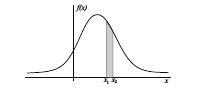
Fig.3 A probability density function.

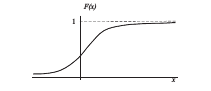
Fig.4 A (cumulative) distribution function.

# Probability for Continuous Random Variables

This notebook introduces the key concepts of continuous random variables, focusing on the **probability density function (PDF)** and the **cumulative distribution function (CDF)**. These functions are essential for computing probabilities associated with continuous random variables. The following sections outline the properties and relationships of the PDF and CDF, with mathematical definitions presented in a rigorous yet accessible manner.

## Probability Density Function (PDF)

For a continuous random variable $X$, the **probability density function** $f(x)$ characterizes the distribution of probabilities across possible values of $X$. The PDF must satisfy the following properties:

- **Non-negativity**: The density function is non-negative for all $x$:
  $$
  f(x) \geq 0.
  $$

- **Probability over an interval**: For any $x_1$ and $x_2$ such that $-\infty < x_1 < x_2 < \infty$, the probability that $X$ lies between $x_1$ and $x_2$ is given by the integral of the PDF:
  $$
  P(x_1 \leq X \leq x_2) = \int_{x_1}^{x_2} f(x) \, dx.
  $$

- **Total probability**: The total area under the PDF curve across the entire real line equals 1, ensuring that $X$ takes some value with certainty:
  $$
  \int_{-\infty}^{\infty} f(x) \, dx = 1.
  $$

These properties are illustrated in *Figure 1.3* (not shown here), where the shaded area under the PDF curve between $x_1$ and $x_2$ represents $P(x_1 \leq X \leq x_2)$.

## Cumulative Distribution Function (CDF)

The **cumulative distribution function (CDF)** $F(x)$ of a continuous random variable $X$ is defined as the probability that $X$ is less than or equal to $x$:

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(u) \, du.
$$

The CDF has the following properties:

- **Limits**: As $x \to \infty$, the CDF approaches 1, consistent with the total probability:
  $$
  \int_{-\infty}^{\infty} f(x) \, dx = 1.
  $$
  Similarly, $F(x) \to 0$ as $x \to -\infty$.

- **Interval probabilities**: The probability that $X$ lies between $x_1$ and $x_2$ can be computed using the CDF:
  $$
  P(x_1 \leq X \leq x_2) = \int_{x_1}^{x_2} f(u) \, du = F(x_2) - F(x_1).
  $$

An example of a CDF is shown in *Figure 1.4* (not shown here), where $F(x)$ represents the cumulative probability up to $x$, rising from 0 to 1 as $x$ increases.

## Summary

The PDF and CDF are fundamental for analyzing continuous random variables:
- The **PDF** $f(x)$ defines the density of probability, with probabilities computed as areas under the curve.
- The **CDF** $F(x)$ provides the cumulative probability, simplifying interval calculations via $F(x_2) - F(x_1)$.

These concepts are visually depicted in *Figures 1.3* (PDF) and *1.4* (CDF), illustrating the distribution and accumulation of probabilities, respectively.

# Probability for Continuous Random Variables

This notebook introduces the key concepts of continuous random variables, focusing on the **probability density function (PDF)** and the **cumulative distribution function (CDF)**. These functions are essential for computing probabilities associated with continuous random variables. The following sections outline the properties and relationships of the PDF and CDF, with mathematical definitions presented in a rigorous yet accessible manner.

## Probability Density Function (PDF)

For a continuous random variable $X$, the **probability density function** $f(x)$ characterizes the distribution of probabilities across possible values of $X$. The PDF must satisfy the following properties:

- **Non-negativity**: The density function is non-negative for all $x$:
  $$
  f(x) \geq 0.
  $$

- **Probability over an interval**: For any $x_1$ and $x_2$ such that $-\infty < x_1 < x_2 < \infty$, the probability that $X$ lies between $x_1$ and $x_2$ is given by the integral of the PDF:
  $$
  P(x_1 \leq X \leq x_2) = \int_{x_1}^{x_2} f(x) \, dx.
  $$

- **Total probability**: The total area under the PDF curve across the entire real line equals 1, ensuring that $X$ takes some value with certainty:
  $$
  \int_{-\infty}^{\infty} f(x) \, dx = 1.
  $$

These properties are illustrated in *Figure 1.3* (not shown here), where the shaded area under the PDF curve between $x_1$ and $x_2$ represents $P(x_1 \leq X \leq x_2)$.

## Cumulative Distribution Function (CDF)

The **cumulative distribution function (CDF)** $F(x)$ of a continuous random variable $X$ is defined as the probability that $X$ is less than or equal to $x$:

$$
F(x) = P(X \leq x) = \int_{-\infty}^{x} f(u) \, du.
$$

The CDF has the following properties:

- **Limits**: As $x \to \infty$, the CDF approaches 1, consistent with the total probability:
  $$
  \int_{-\infty}^{\infty} f(x) \, dx = 1.
  $$
  Similarly, $F(x) \to 0$ as $x \to -\infty$.

- **Interval probabilities**: The probability that $X$ lies between $x_1$ and $x_2$ can be computed using the CDF:
  $$
  P(x_1 \leq X \leq x_2) = \int_{x_1}^{x_2} f(u) \, du = F(x_2) - F(x_1).
  $$

An example of a CDF is shown in *Figure 1.4* (not shown here), where $F(x)$ represents the cumulative probability up to $x$, rising from 0 to 1 as $x$ increases.

## Summary

The PDF and CDF are fundamental for analyzing continuous random variables:
- The **PDF** $f(x)$ defines the density of probability, with probabilities computed as areas under the curve.
- The **CDF** $F(x)$ provides the cumulative probability, simplifying interval calculations via $F(x_2) - F(x_1)$.

These concepts are visually depicted in *Figures 1.3* (PDF) and *1.4* (CDF), illustrating the distribution and accumulation of probabilities, respectively.


In [6]:
# Pinhole camera projection implementation without any libraries
# Projects 3D points (x, y, z) onto a 2D image plane using perspective projection
# Outputs projected coordinates and an ASCII visualization

def pinhole_projection(points_3d, focal_length):
    """Project 3D points (x, y, z) onto 2D image plane at z = -f."""
    points_2d = []
    for point in points_3d:
        x = point[0]
        y = point[1]
        z = point[2]
        if z <= 0:  # Skip points behind or at pinhole
            continue
        # Perspective projection: x' = -f * x/z, y' = -f * y/z
        x_prime = -focal_length * x / z
        y_prime = -focal_length * y / z
        points_2d.append((x_prime, y_prime))
    return points_2d

def text_visualization(points_2d, grid_size=20, scale=5):
    """Create an ASCII grid to show projected 2D points."""
    grid = [[' ' for _ in range(grid_size)] for _ in range(grid_size)]
    center = grid_size // 2

    for x_prime, y_prime in points_2d:
        # Scale and translate to grid coordinates
        x_grid = int(center + x_prime * scale)
        y_grid = int(center - y_prime * scale)  # Invert y for display
        # Ensure points are within grid
        if 0 <= x_grid < grid_size and 0 <= y_grid < grid_size:
            grid[y_grid][x_grid] = '*'

    # Print grid
    print("\n2D Image Plane (ASCII Visualization):")
    print('-' * (grid_size + 2))
    for row in grid:
        print('|' + ''.join(row) + '|')
    print('-' * (grid_size + 2))

# Define a simple 3D scene (cube vertices at z > 0)
cube_vertices = [
    (1, 1, 5), (1, -1, 5), (-1, -1, 5), (-1, 1, 5),  # Front face
    (1, 1, 7), (1, -1, 7), (-1, -1, 7), (-1, 1, 7)   # Back face
]

# Parameters
focal_length = 2.0  # Distance to image plane

# Project 3D points to 2D
projected_points = pinhole_projection(cube_vertices, focal_length)

# Print projected coordinates
print("Projected 2D Points (x', y'):")
for i, point in enumerate(projected_points):
    print("Point {}: ({:.4f}, {:.4f})".format(i+1, point[0], point[1]))

# Visualize as ASCII grid
text_visualization(projected_points, grid_size=20, scale=5)

Projected 2D Points (x', y'):
Point 1: (-0.4000, -0.4000)
Point 2: (-0.4000, 0.4000)
Point 3: (0.4000, 0.4000)
Point 4: (0.4000, -0.4000)
Point 5: (-0.2857, -0.2857)
Point 6: (-0.2857, 0.2857)
Point 7: (0.2857, 0.2857)
Point 8: (0.2857, -0.2857)

2D Image Plane (ASCII Visualization):
----------------------
|                    |
|                    |
|                    |
|                    |
|                    |
|                    |
|                    |
|                    |
|        *  **       |
|                    |
|                    |
|        *  *        |
|        *   *       |
|                    |
|                    |
|                    |
|                    |
|                    |
|                    |
|                    |
----------------------


## Example 1.6: Uniform Distribution

We are given the probability density function (pdf) $f(x)$ as:

$$
f(x) = \begin{cases}
\frac{1}{b - a} & \text{for } a \leq x \leq b \\
0 & \text{for all other values of } x
\end{cases}
$$

We need to show that this is a valid probability density function and find its cumulative distribution function (CDF).

**Verification of pdf conditions:**

A function $f(x)$ is a valid pdf if it satisfies two conditions:
(a) $f(x) \geq 0$ for all $x$.
(c) $\int_{-\infty}^{\infty} f(x) dx = 1$.

For the given function:

(a) Since $b > a$, $\frac{1}{b - a} > 0$. Also, $f(x) = 0$ for $x < a$ or $x > b$. Therefore, $f(x) \geq 0$ for all $x$.

(c)
$$
\int_{-\infty}^{\infty} f(x) dx = \int_{-\infty}^{a} 0 \, dx + \int_{a}^{b} \frac{1}{b - a} \, dx + \int_{b}^{\infty} 0 \, dx
$$
$$
= 0 + \left[ \frac{x}{b - a} \right]_{a}^{b} + 0
$$
$$
= \frac{b}{b - a} - \frac{a}{b - a} = \frac{b - a}{b - a} = 1
$$

Since both conditions are satisfied, $f(x)$ is a valid probability density function. This is the pdf of the uniform distribution.

**Finding the Cumulative Distribution Function (CDF):**

The cumulative distribution function $F(x)$ is defined as $F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t) dt$.

We need to consider three cases for $x$:

Case 1: $x < a$
$$
F(x) = \int_{-\infty}^{x} 0 \, dt = 0
$$

Case 2: $a \leq x \leq b$
$$
F(x) = \int_{-\infty}^{a} 0 \, dt + \int_{a}^{x} \frac{1}{b - a} \, dt
$$
$$
= 0 + \left[ \frac{t}{b - a} \right]_{a}^{x} = \frac{x}{b - a} - \frac{a}{b - a} = \frac{x - a}{b - a}
$$

Case 3: $x > b$
$$
F(x) = \int_{-\infty}^{a} 0 \, dt + \int_{a}^{b} \frac{1}{b - a} \, dt + \int_{b}^{x} 0 \, dt
$$
$$
= 0 + \left[ \frac{t}{b - a} \right]_{a}^{b} + 0 = \frac{b - a}{b - a} = 1
$$

Therefore, the cumulative distribution function $F(x)$ is given by:

$$
F(x) = \begin{cases}
0 & \text{for } x < a \\
\frac{x - a}{b - a} & \text{for } a \leq x \leq b \\
1 & \text{for } x > b
\end{cases}
$$

## 1.6 Mean and Variance

The **mean** (or expectation or expected value), $E(X)$ or $\mu$, of a discrete random variable $X$ is defined as:

$$
\mu = E(X) = \sum_{i=0}^{\infty} x_i p(x_i)
$$

where $p(x_i) = P(X = x_i)$.

For a continuous random variable $X$, the mean is defined as:

$$
\mu = E(X) = \int_{-\infty}^{\infty} x f(x) dx
$$

where $f(x)$ is the probability density function. The mean represents the weighted average of the values of $X$.

The **variance** of $X$, denoted by $V(X)$ or $\sigma^2$, measures the spread or dispersion of the probability distribution around the mean. It is defined as the expected value of the squared deviation of $X$ from its mean:

$$
\sigma^2 = V(X) = E[(X - E(X))^2] = E[(X - \mu)^2]
$$

For a discrete random variable:

$$
\sigma^2 = \sum_{i=0}^{\infty} (x_i - \mu)^2 p(x_i) \quad \text{or} \quad \sigma^2 = \sum_{x \in V} (x - \mu)^2 p(x)
$$

For a continuous random variable:

$$
\sigma^2 = \int_{-\infty}^{\infty} (x - \mu)^2 f(x) dx
$$

The variance quantifies how much the individual values of $X$ deviate from the mean.

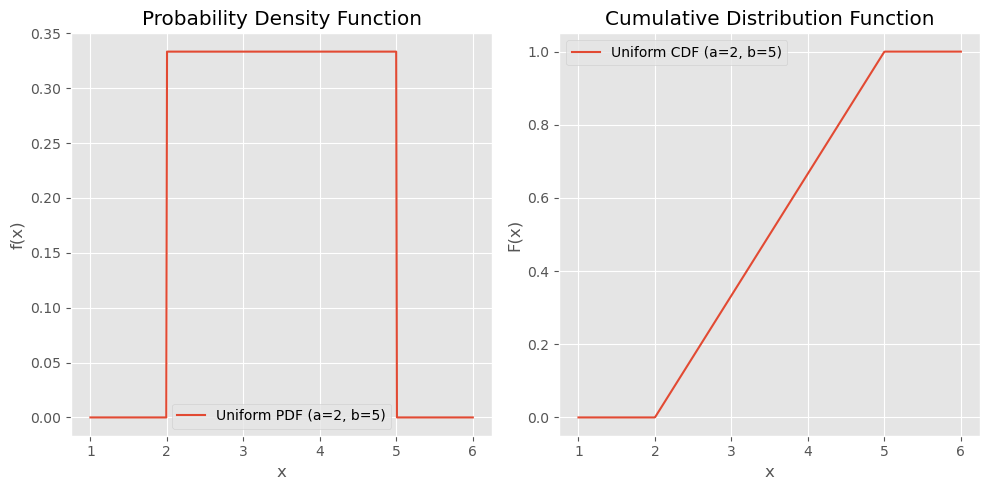


For x = 3.5:
  PDF: f(3.5) = 0.3333333333333333
  CDF: F(3.5) = 0.5

For x = [1.  3.  4.5 6. ]:
  PDF: f(x) = [0.         0.33333333 0.33333333 0.        ]
  CDF: F(x) = [0.         0.33333333 0.83333333 1.        ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_pdf(x, a, b):
  """
  Probability density function of a uniform distribution.

  Args:
    x (float or numpy.ndarray): The value(s) at which to evaluate the PDF.
    a (float): The lower bound of the uniform distribution.
    b (float): The upper bound of the uniform distribution.

  Returns:
    float or numpy.ndarray: The PDF value(s) at the given x.
  """
  if isinstance(x, np.ndarray):
    result = np.zeros_like(x, dtype=float)
    result[(x >= a) & (x <= b)] = 1 / (b - a)
    return result
  elif a <= x <= b:
    return 1 / (b - a)
  else:
    return 0

def uniform_cdf(x, a, b):
  """
  Cumulative distribution function of a uniform distribution.

  Args:
    x (float or numpy.ndarray): The value(s) at which to evaluate the CDF.
    a (float): The lower bound of the uniform distribution.
    b (float): The upper bound of the uniform distribution.

  Returns:
    float or numpy.ndarray: The CDF value(s) at the given x.
  """
  if isinstance(x, np.ndarray):
    result = np.zeros_like(x, dtype=float)
    mask_ab = (x >= a) & (x <= b)
    result[mask_ab] = (x[mask_ab] - a) / (b - a)
    result[x > b] = 1.0
    return result
  elif x < a:
    return 0.0
  elif a <= x <= b:
    return (x - a) / (b - a)
  else:
    return 1.0

if __name__ == '__main__':
  # Define the parameters of the uniform distribution
  a = 2
  b = 5

  # Generate x values for plotting
  x = np.linspace(a - 1, b + 1, 500)

  # Calculate the PDF and CDF values
  pdf_values = uniform_pdf(x, a, b)
  cdf_values = uniform_cdf(x, a, b)

  # Plot the PDF
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, pdf_values, label=f'Uniform PDF (a={a}, b={b})')
  plt.title('Probability Density Function')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.grid(True)
  plt.legend()

  # Plot the CDF
  plt.subplot(1, 2, 2)
  plt.plot(x, cdf_values, label=f'Uniform CDF (a={a}, b={b})')
  plt.title('Cumulative Distribution Function')
  plt.xlabel('x')
  plt.ylabel('F(x)')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()

  # Example usage of the functions for a single value
  x_val = 3.5
  pdf_at_x = uniform_pdf(x_val, a, b)
  cdf_at_x = uniform_cdf(x_val, a, b)
  print(f"\nFor x = {x_val}:")
  print(f"  PDF: f({x_val}) = {pdf_at_x}")
  print(f"  CDF: F({x_val}) = {cdf_at_x}")

  # Example usage with numpy arrays
  x_array = np.array([1, 3, 4.5, 6])
  pdf_array = uniform_pdf(x_array, a, b)
  cdf_array = uniform_cdf(x_array, a, b)
  print(f"\nFor x = {x_array}:")
  print(f"  PDF: f(x) = {pdf_array}")
  print(f"  CDF: F(x) = {cdf_array}")

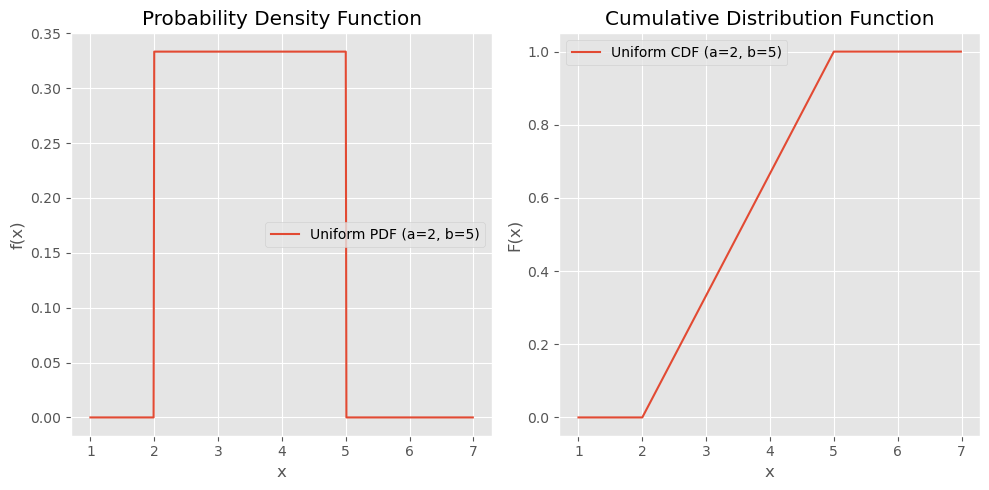


For x = 3.5:
  PDF: f(3.5) = 0.3333333333333333
  CDF: F(3.5) = 0.5

For x = [1, 3, 4.5, 6]:
  PDF: f(x) = [0, 0.3333333333333333, 0.3333333333333333, 0]
  CDF: F(x) = [0.0, 0.3333333333333333, 0.8333333333333334, 1.0]


In [8]:
import matplotlib.pyplot as plt

def uniform_pdf_non_numpy(x, a, b):
  """
  Probability density function of a uniform distribution (non-NumPy).

  Args:
    x (float): The value at which to evaluate the PDF.
    a (float): The lower bound of the uniform distribution.
    b (float): The upper bound of the uniform distribution.

  Returns:
    float: The PDF value at the given x.
  """
  if a <= x <= b:
    return 1 / (b - a)
  else:
    return 0

def uniform_cdf_non_numpy(x, a, b):
  """
  Cumulative distribution function of a uniform distribution (non-NumPy).

  Args:
    x (float): The value at which to evaluate the CDF.
    a (float): The lower bound of the uniform distribution.
    b (float): The upper bound of the uniform distribution.

  Returns:
    float: The CDF value at the given x.
  """
  if x < a:
    return 0.0
  elif a <= x <= b:
    return (x - a) / (b - a)
  else:
    return 1.0

if __name__ == '__main__':
  # Define the parameters of the uniform distribution
  a = 2
  b = 5

  # Generate x values for plotting (without NumPy)
  x_values = [a - 1 + 0.01 * i for i in range(200)] + \
             [a + 0.01 * i for i in range(int((b - a) * 100) + 1)] + \
             [b + 0.01 * i for i in range(200)]
  x_values = sorted(list(set(x_values))) # Remove duplicates and sort

  # Calculate the PDF and CDF values
  pdf_values = [uniform_pdf_non_numpy(x, a, b) for x in x_values]
  cdf_values = [uniform_cdf_non_numpy(x, a, b) for x in x_values]

  # Plot the PDF
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x_values, pdf_values, label=f'Uniform PDF (a={a}, b={b})')
  plt.title('Probability Density Function')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.grid(True)
  plt.legend()

  # Plot the CDF
  plt.subplot(1, 2, 2)
  plt.plot(x_values, cdf_values, label=f'Uniform CDF (a={a}, b={b})')
  plt.title('Cumulative Distribution Function')
  plt.xlabel('x')
  plt.ylabel('F(x)')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()

  # Example usage of the functions for a single value
  x_val = 3.5
  pdf_at_x = uniform_pdf_non_numpy(x_val, a, b)
  cdf_at_x = uniform_cdf_non_numpy(x_val, a, b)
  print(f"\nFor x = {x_val}:")
  print(f"  PDF: f({x_val}) = {pdf_at_x}")
  print(f"  CDF: F({x_val}) = {cdf_at_x}")

  # Example usage with a list of values
  x_list = [1, 3, 4.5, 6]
  pdf_list = [uniform_pdf_non_numpy(x, a, b) for x in x_list]
  cdf_list = [uniform_cdf_non_numpy(x, a, b) for x in x_list]
  print(f"\nFor x = {x_list}:")
  print(f"  PDF: f(x) = {pdf_list}")
  print(f"  CDF: F(x) = {cdf_list}")

## 1.6 Mean and Variance (Continued)

The **standard deviation (sd)** of a random variable $X$, denoted by $\sigma$, is the square root of its variance $V(X)$:

$$
\sigma = \sqrt{V(X)}
$$

The standard deviation provides a measure of the spread of the distribution in the same units as the mean.

A function of a random variable, $h(X)$, is itself a random variable. The **expectation of a function of a random variable** is given by:

For a discrete random variable $X$:
$$
E[h(X)] = \sum_{i=0}^{\infty} h(x_i) p(x_i) \quad \text{or} \quad E[h(X)] = \sum_{x \in V} h(x) p(x)
$$

For a continuous random variable $X$:
$$
E[h(X)] = \int_{-\infty}^{\infty} h(x) f(x) dx
$$

where $V$ is the sample space of $X$.

For a **linear function of a random variable** $aX + b$, where $a$ and $b$ are constants, the expectation and variance have the following properties:

**Expectation of a linear function:**
$$
E(aX + b) = aE(X) + b = a\mu + b \quad (1.11)
$$

**Variance of a linear function:**
$$
V(aX + b) = E[(aX + b - (a\mu + b))^2] = E[(aX - a\mu)^2] = a^2 E[(X - \mu)^2] = a^2 V(X) \quad (1.12)
$$

Note that adding a constant $b$ to the random variable does not change its variance.

An alternative **computational formula for the variance** is:
$$
V(X) = E[(X - \mu)^2] = E(X^2) - 2\mu E(X) + \mu^2 = E(X^2) - \mu^2 \quad (1.13)
$$

These results hold for both discrete and continuous random variables, provided that the expectations and variances exist (i.e., the summations and integrals are finite).

More generally, for the **expectation of a linear combination of functions of a random variable**:
$$
E\left[ \sum_{i=1}^{k} a_i h_i(X) \right] = \sum_{i=1}^{k} a_i E[h_i(X)] \quad (1.14)
$$

where $a_i$ are constants and $h_i(X)$ are functions of the random variable $X$.

## 1.7 Some Standard Discrete Probability Distributions

In this section, we will explore some common discrete random variables where the random variable $X$ takes integer values and its probability distribution is described by a probability mass function $p(x_i)$ or $p_i$. The random variables discussed here often arise from the numerical outcomes of independent repetitions (or trials) of a **Bernoulli experiment**. A Bernoulli experiment is a simple experiment with two possible outcomes.

In [9]:
import matplotlib.pyplot as plt

def calculate_mean_discrete(values, probabilities):
  """
  Calculates the mean (expected value) of a discrete random variable.

  Args:
    values (list or tuple): The possible values the random variable can take.
    probabilities (list or tuple): The corresponding probabilities of each value.

  Returns:
    float: The mean of the discrete random variable.
           Returns None if the lengths of values and probabilities don't match
           or if probabilities don't sum to 1 (approximately).
  """
  if len(values) != len(probabilities):
    print("Error: Lengths of values and probabilities must be the same.")
    return None
  if not (0.999 <= sum(probabilities) <= 1.001):
    print("Warning: Probabilities do not sum to 1.")

  mean = sum(x * p for x, p in zip(values, probabilities))
  return mean

def calculate_variance_discrete(values, probabilities, mean=None):
  """
  Calculates the variance of a discrete random variable.

  Args:
    values (list or tuple): The possible values the random variable can take.
    probabilities (list or tuple): The corresponding probabilities of each value.
    mean (float, optional): The mean of the random variable. If None, it will
                             be calculated using calculate_mean_discrete.
                             Defaults to None.

  Returns:
    float: The variance of the discrete random variable.
           Returns None if the lengths of values and probabilities don't match
           or if probabilities don't sum to 1 (approximately).
  """
  if len(values) != len(probabilities):
    print("Error: Lengths of values and probabilities must be the same.")
    return None
  if not (0.999 <= sum(probabilities) <= 1.001):
    print("Warning: Probabilities do not sum to 1.")

  if mean is None:
    mean = calculate_mean_discrete(values, probabilities)
    if mean is None:
      return None

  variance = sum((x - mean) ** 2 * p for x, p in zip(values, probabilities))
  return variance

def calculate_mean_continuous(pdf_func, lower_bound, upper_bound, num_points=1000):
  """
  Approximates the mean (expected value) of a continuous random variable
  using numerical integration (midpoint rule).

  Args:
    pdf_func (callable): The probability density function (PDF).
                         It should take a single numerical argument and return the PDF value.
    lower_bound (float): The lower limit of integration.
    upper_bound (float): The upper limit of integration.
    num_points (int, optional): The number of points to use for numerical
                                 integration. Higher values give better approximation.
                                 Defaults to 1000.

  Returns:
    float: The approximate mean of the continuous random variable.
  """
  delta_x = (upper_bound - lower_bound) / num_points
  mean = 0
  for i in range(num_points):
    midpoint = lower_bound + (i + 0.5) * delta_x
    mean += midpoint * pdf_func(midpoint) * delta_x
  return mean

def calculate_variance_continuous(pdf_func, lower_bound, upper_bound, mean=None, num_points=1000):
  """
  Approximates the variance of a continuous random variable using
  numerical integration (midpoint rule).

  Args:
    pdf_func (callable): The probability density function (PDF).
                         It should take a single numerical argument and return the PDF value.
    lower_bound (float): The lower limit of integration.
    upper_bound (float): The upper limit of integration.
    mean (float, optional): The mean of the random variable. If None, it will
                             be approximated using calculate_mean_continuous.
                             Defaults to None.
    num_points (int, optional): The number of points to use for numerical
                                 integration. Higher values give better approximation.
                                 Defaults to 1000.

  Returns:
    float: The approximate variance of the continuous random variable.
  """
  delta_x = (upper_bound - lower_bound) / num_points
  variance = 0
  if mean is None:
    mean = calculate_mean_continuous(pdf_func, lower_bound, upper_bound, num_points)

  for i in range(num_points):
    midpoint = lower_bound + (i + 0.5) * delta_x
    variance += (midpoint - mean) ** 2 * pdf_func(midpoint) * delta_x
  return variance

def calculate_expectation_h_discrete(values, probabilities, h_func):
  """
  Calculates the expectation of a function h(X) for a discrete random variable.

  Args:
    values (list or tuple): The possible values the random variable can take.
    probabilities (list or tuple): The corresponding probabilities of each value.
    h_func (callable): The function h(x) to apply to the random variable.

  Returns:
    float: The expectation of h(X).
           Returns None if the lengths of values and probabilities don't match
           or if probabilities don't sum to 1 (approximately).
  """
  if len(values) != len(probabilities):
    print("Error: Lengths of values and probabilities must be the same.")
    return None
  if not (0.999 <= sum(probabilities) <= 1.001):
    print("Warning: Probabilities do not sum to 1.")

  expectation = sum(h_func(x) * p for x, p in zip(values, probabilities))
  return expectation

def calculate_expectation_h_continuous(pdf_func, lower_bound, upper_bound, h_func, num_points=1000):
  """
  Approximates the expectation of a function h(X) for a continuous
  random variable using numerical integration (midpoint rule).

  Args:
    pdf_func (callable): The probability density function (PDF).
                         It should take a single numerical argument and return the PDF value.
    lower_bound (float): The lower limit of integration.
    upper_bound (float): The upper limit of integration.
    h_func (callable): The function h(x) to apply to the random variable.
    num_points (int, optional): The number of points to use for numerical
                                 integration. Higher values give better approximation.
                                 Defaults to 1000.

  Returns:
    float: The approximate expectation of h(X).
  """
  delta_x = (upper_bound - lower_bound) / num_points
  expectation = 0
  for i in range(num_points):
    midpoint = lower_bound + (i + 0.5) * delta_x
    expectation += h_func(midpoint) * pdf_func(midpoint) * delta_x
  return expectation

if __name__ == '__main__':
  # Example for a discrete random variable
  discrete_values = [1, 2, 3, 4]
  discrete_probabilities = [0.1, 0.2, 0.4, 0.3]

  mean_discrete = calculate_mean_discrete(discrete_values, discrete_probabilities)
  variance_discrete = calculate_variance_discrete(discrete_values, discrete_probabilities, mean_discrete)
  sd_discrete = variance_discrete**0.5

  print("--- Discrete Random Variable ---")
  print(f"Values: {discrete_values}")
  print(f"Probabilities: {discrete_probabilities}")
  print(f"Mean: {mean_discrete}")
  print(f"Variance: {variance_discrete}")
  print(f"Standard Deviation: {sd_discrete}")

  # Example for a continuous random variable (using the uniform distribution PDF)
  def uniform_pdf_example(x):
    a = 2
    b = 5
    if a <= x <= b:
      return 1 / (b - a)
    else:
      return 0

  lower_bound_continuous = 1
  upper_bound_continuous = 6

  mean_continuous = calculate_mean_continuous(uniform_pdf_example, lower_bound_continuous, upper_bound_continuous)
  variance_continuous = calculate_variance_continuous(uniform_pdf_example, lower_bound_continuous, upper_bound_continuous, mean_continuous)
  sd_continuous = variance_continuous**0.5

  print("\n--- Continuous Random Variable (Uniform Distribution Example) ---")
  print(f"PDF: Uniform between 2 and 5 (defined in uniform_pdf_example)")
  print(f"Integration Range: [{lower_bound_continuous}, {upper_bound_continuous}]")
  print(f"Approximate Mean: {mean_continuous}")
  print(f"Approximate Variance: {variance_continuous}")
  print(f"Approximate Standard Deviation: {sd_continuous}")

  # Example for expectation of h(X) - Discrete
  def h_x_discrete(x):
    return x**2 + 1

  expectation_h_discrete = calculate_expectation_h_discrete(discrete_values, discrete_probabilities, h_x_discrete)
  print("\n--- Expectation of h(X) - Discrete ---")
  print(f"h(X) = X^2 + 1")
  print(f"E[h(X)]: {expectation_h_discrete}")

  # Example for expectation of h(X) - Continuous
  def h_x_continuous(x):
    return 2 * x

  expectation_h_continuous = calculate_expectation_h_continuous(uniform_pdf_example, lower_bound_continuous, upper_bound_continuous, h_x_continuous)
  print("\n--- Expectation of h(X) - Continuous ---")
  print(f"h(X) = 2 * X")
  print(f"E[h(X)]: {expectation_h_continuous}")

--- Discrete Random Variable ---
Values: [1, 2, 3, 4]
Probabilities: [0.1, 0.2, 0.4, 0.3]
Mean: 2.9000000000000004
Variance: 0.8900000000000001
Standard Deviation: 0.9433981132056605

--- Continuous Random Variable (Uniform Distribution Example) ---
PDF: Uniform between 2 and 5 (defined in uniform_pdf_example)
Integration Range: [1, 6]
Approximate Mean: 3.4999999999999996
Approximate Variance: 0.7499979166666672
Approximate Standard Deviation: 0.8660242009705428

--- Expectation of h(X) - Discrete ---
h(X) = X^2 + 1
E[h(X)]: 10.3

--- Expectation of h(X) - Continuous ---
h(X) = 2 * X
E[h(X)]: 6.999999999999999
